Hellow, This is David Xue. I would like to try some machine learning using jupyter notebook.

First, let's import some library and data. 
I would like to import numpy, pandas, seaborn and matplotlib.pyplot

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Now introduce machine learning library with KNN

In [3]:
from sklearn import metrics


metrics used to quantify the quality of predictions section and the Pairwise metrics, Affinities and Kernels section of the user guide for further details. 
The sklearn.metrics module includes score functions, performance metrics and pairwise metrics and distance computations.

In [4]:
from sklearn.neighbors import KNeighborsClassifier # import KNN classifier

In [5]:
from sklearn.linear_model import LogisticRegression # import legisticRegression

In [6]:
from sklearn.model_selection import train_test_split # import train_test_split

Now let's load iris dataset

In [7]:
data = pd.read_csv ('./Iris.csv')

<h3>preview this Iris data</h3>

In [8]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [10]:
data.describe() # This is a cool function, allows me to see median mean ect for this piece of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Now lets have a look about the iris classifier, I would like to know how many type of Strings are shown in this column. 

In [11]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

As you can tell above there are there are three difference iris species in this table. 

<h3> data visualization </h3>

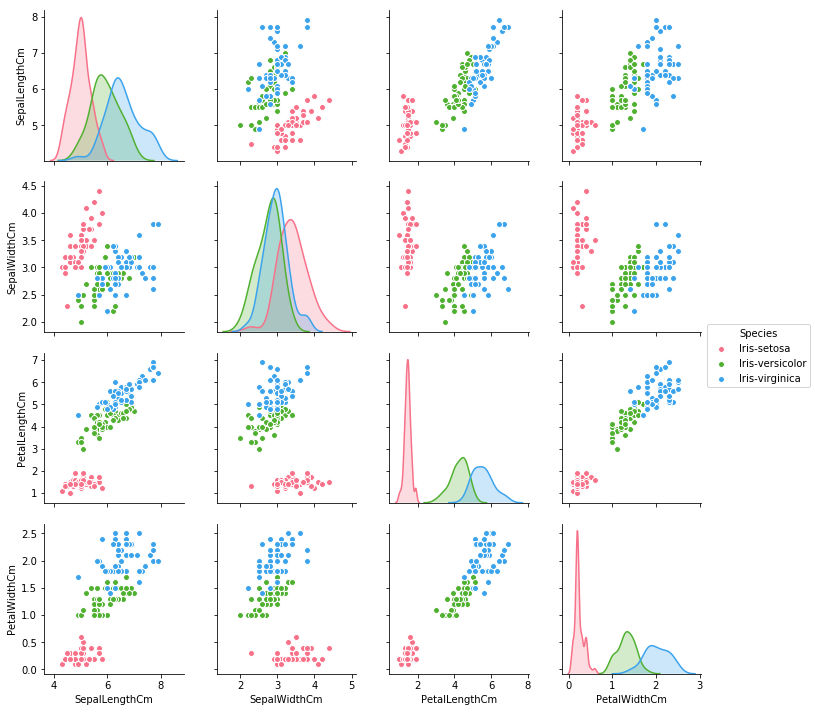

In [12]:
tmp = data.drop('Id', axis=1) #remove id column
g = sns.pairplot(tmp, hue='Species',palette="husl",diag_kind= "kde", diag_kws=dict(shade=True))
#plt.show()

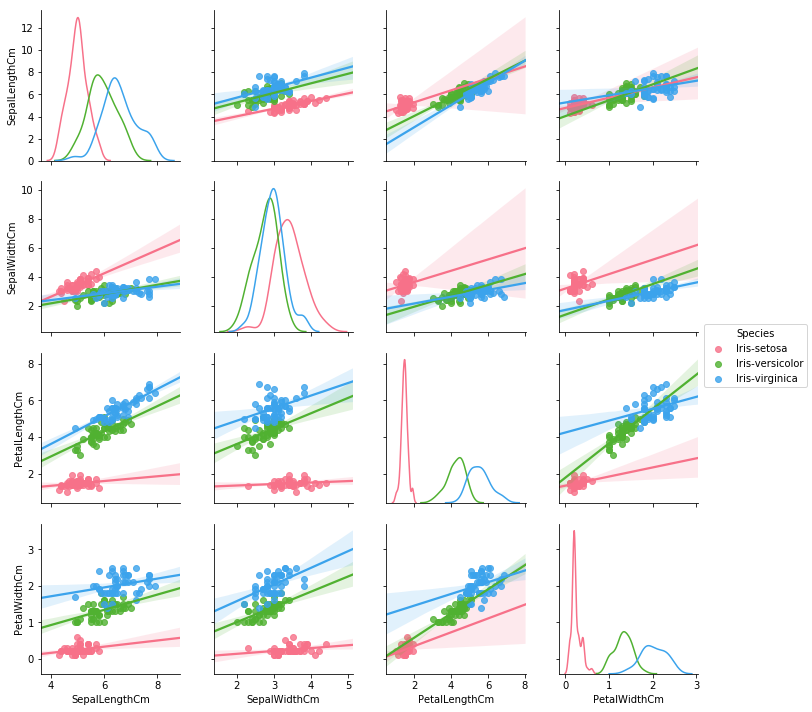

In [13]:
g = sns.pairplot(tmp, hue='Species',palette="husl",diag_kind="kde",kind="reg")

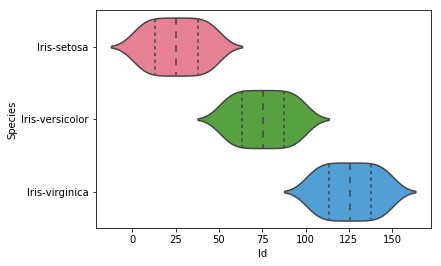

In [14]:
g = sns.violinplot(y='Species', x='Id', data=data, inner='quartile',palette="husl") # plot id distribution

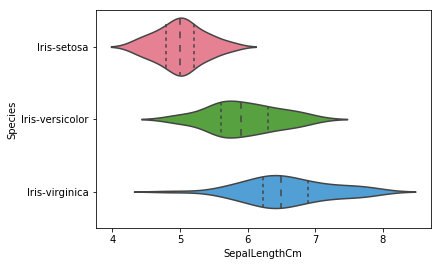

In [15]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile',palette="husl") # SepalLengthCm distribution in three species

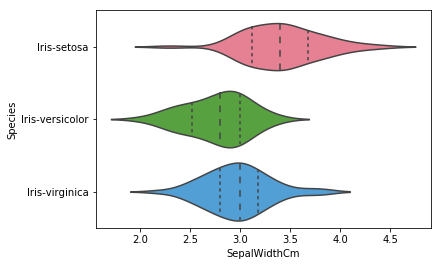

In [16]:
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile',palette="husl")

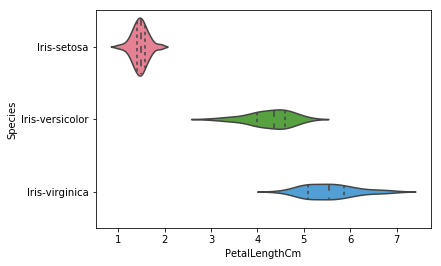

In [17]:
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile',palette="husl")

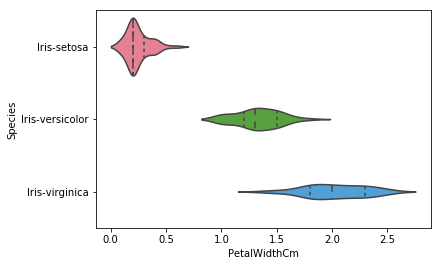

In [18]:
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile',palette="husl")

Basically, sns.violinplot can plot the histology in another way accoding to the distribution of the data. sns.pairplot can have the overall ploting of all parameters for each column combination. 
Below is a pariwised plot of very column, including id

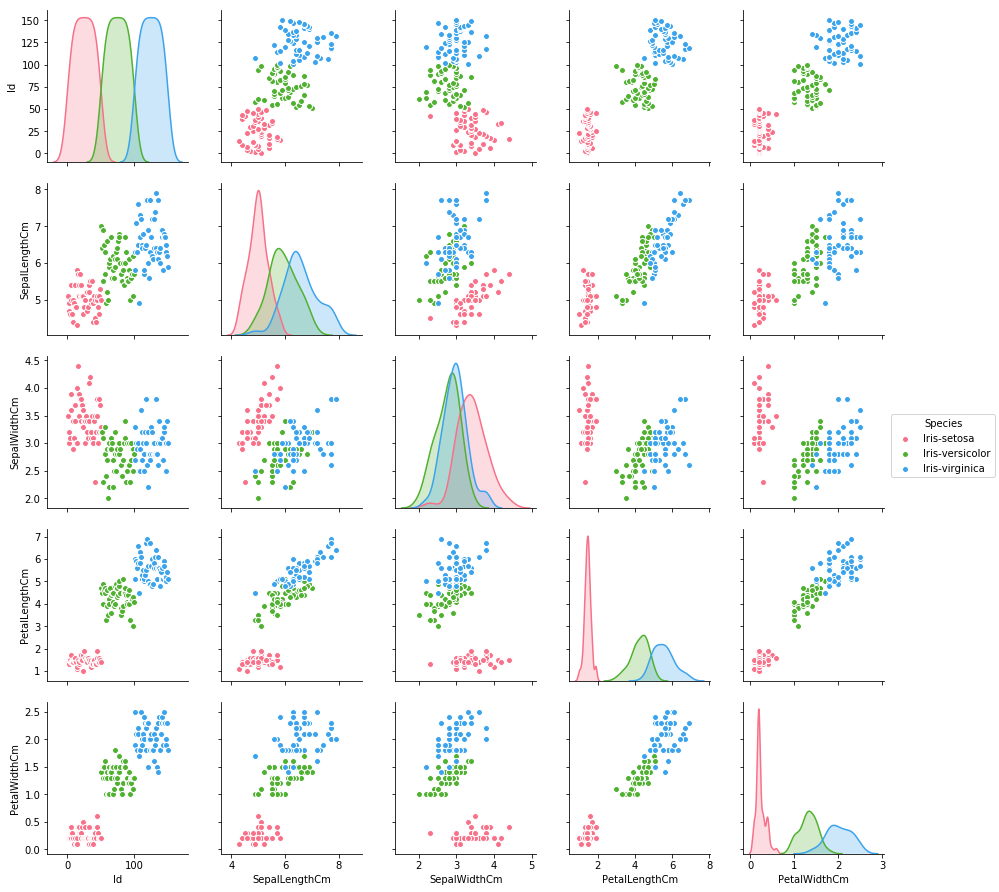

In [19]:
g = sns.pairplot(data, hue='Species',palette="husl",diag_kind="kde", markers = "o",diag_kws=dict(shade=True))

<h2>Machine learning</h2>
First, split data as training data and testing data

In [20]:
X = data.drop(["Id", "Species"], axis =1)
y = data["Species"]
print (X.shape)
print (y.shape)

(150, 4)
(150,)


Number of K are listed below
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]
scores before update
[]


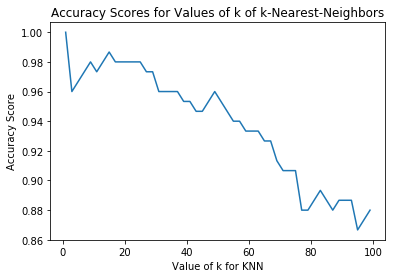

In [21]:
# experimenting with different 1,3, 5, 7, 9....99 values. 
# At this point, all the data was used. This will easily cause overfit.
k_range = list(range(1,100,2))
print ("Number of K are listed below")
print (k_range)
scores = []
print ("scores before update")
print (scores)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) # invoke KNN classifier with different N, this step is like making a constructor
    knn.fit(X, y) # give pairwized features to build a KNN model using all the iris dataset
    y_pred = knn.predict(X) # predict labels based on KNN class (model has been updated in this class), and features X
    scores.append(metrics.accuracy_score(y, y_pred)) # metrics.accuracy_score() is used to calculate accuracy
    
plt.plot(k_range, scores) # this is just plot x as different Ks, y as the accuracy
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)[source]
Accuracy classification score.

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

As we can tell from the above plot, K = 1 get 100% accuracy, which is caused by overfit. it seems that K = 15 get the best results.

<h3>Splite data as testing dataset and training dataset</h3>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


Here are just some simple check on irs_training dataset

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 60 to 99
Data columns (total 4 columns):
SepalLengthCm    90 non-null float64
SepalWidthCm     90 non-null float64
PetalLengthCm    90 non-null float64
PetalWidthCm     90 non-null float64
dtypes: float64(4)
memory usage: 3.5 KB


In [24]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
147,6.5,3.0,5.2,2.0
104,6.5,3.0,5.8,2.2
52,6.9,3.1,4.9,1.5
22,4.6,3.6,1.0,0.2


In [25]:
y_train.head()

60     Iris-versicolor
147     Iris-virginica
104     Iris-virginica
52     Iris-versicolor
22         Iris-setosa
Name: Species, dtype: object

<hr>Let's use training data to train KNN, and then use training and testing data to calculate accuracy

Number of K are listed below
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


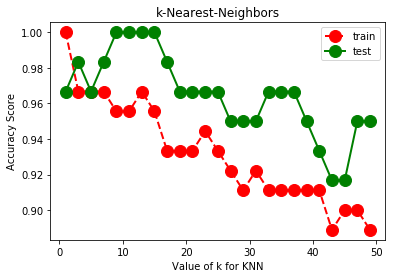

,K,train,test
0,1,1.000000,0.966667
1,3,0.966667,0.983333
2,5,0.966667,0.966667
3,7,0.966667,0.983333
4,9,0.955556,1.000000
5,11,0.955556,1.000000
6,13,0.966667,1.000000
7,15,0.955556,1.000000
8,17,0.933333,0.983333
9,19,0.933333,0.966667


In [26]:
# experimenting with different 1,3, 5, 7, 9....99 values. 
# At this point, all the data was used. This will easily cause overfit.
k_range = list(range(1,50,2))
print ("Number of K are listed below")
print (k_range)
# make two sets of arrays to store accuracy with training and testing dataset
scores_train = []
scores_test = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) # invoke KNN classifier with different N, this step is like making a constructor
    knn.fit(X_train, y_train) # give pairwized features to build a KNN model using all the iris dataset
    y_pred_train = knn.predict(X_train) # predict labels based on KNN class (model has been updated in this class), and features X
    scores_train.append(metrics.accuracy_score(y_train, y_pred_train)) # metrics.accuracy_score() is used to calculate accuracy of training dataset
    y_pred_test = knn.predict(X_test)
    scores_test.append (metrics.accuracy_score(y_test, y_pred_test))

scores = [scores_train,scores_test ]  
tr=plt.plot(k_range, scores_train, label='train',color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12) # this is just plot x as different Ks, y as the accuracy
te=plt.plot(k_range, scores_test,label='test',color='green', marker='o', linewidth=2, markersize=12)
plt.legend()

plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('k-Nearest-Neighbors')

plt.show()

# put all data into pandas dataframe to show table
df = pd.DataFrame(data={'K': k_range, 'train': scores_train, 'test':scores_test})
df



In summary, as k increase the accuracy score for training dataset decrease, and the k for test dataset increase. The best K is between 9 and 15.

<h3>Cross validation for KNN</h3>

In [28]:
from sklearn.model_selection import cross_val_score # import cross validation library

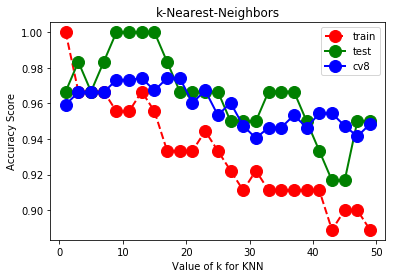

,K,train,test,Cross Validation
0,1,1.000000,0.966667,0.959325
1,3,0.966667,0.983333,0.966270
2,5,0.966667,0.966667,0.966270
3,7,0.966667,0.983333,0.966270
4,9,0.955556,1.000000,0.973214
5,11,0.955556,1.000000,0.973214
6,13,0.966667,1.000000,0.974206
7,15,0.955556,1.000000,0.967262
8,17,0.933333,0.983333,0.974206
9,19,0.933333,0.966667,0.974206


In [29]:
cross_scores= []
# here cross validation were applied to knn with different k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cross_scores.append (np.mean(cross_val_score(knn, X, y, cv=8)))

tr=plt.plot(k_range, scores_train, label='train',color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12) # this is just plot x as different Ks, y as the accuracy
te=plt.plot(k_range, scores_test,label='test',color='green', marker='o', linewidth=2, markersize=12)
tc=plt.plot (k_range, cross_scores,label='cv8',color='blue', marker='o', linewidth=2, markersize=12)
plt.legend()

plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('k-Nearest-Neighbors')

plt.show()

df.insert(df.shape[1], "Cross Validation",cross_scores )
df

As shown above, the accuracy score for cross validation shows much stable trend. first increase then decrease. The best Ks are also betwene 9 and 17. 

<h2> SVM </h2>


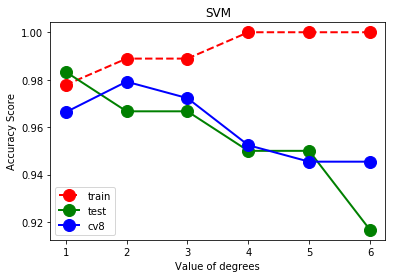

,degree,train,test,cross
0,1,0.977778,0.983333,0.966270
1,2,0.988889,0.966667,0.979167
2,3,0.988889,0.966667,0.972222
3,4,1.000000,0.950000,0.952381
4,5,1.000000,0.950000,0.945437
5,6,1.000000,0.916667,0.945437


In [30]:
# import library
from sklearn import svm
# save scores
scores_train = []
scores_test = []
scores_cross = []
degrees = list (range(1,7))
# here I only study effects on differernt degrees
for degree in degrees:
    svc = svm.SVC(kernel="poly", degree=degree)
    svc.fit (X_train,y_train)
    y_pred_train = svc.predict(X_train) # predict labels based on svc class (model has been updated in this class), and features X
    scores_train.append(metrics.accuracy_score(y_train, y_pred_train)) # metrics.accuracy_score() is used to calculate accuracy of training dataset
    y_pred_test = svc.predict(X_test)
    scores_test.append (metrics.accuracy_score(y_test, y_pred_test))
    # now deal with cross validation
    scores_cross.append (np.mean(cross_val_score(svc, X, y, cv=8)))
    
tr=plt.plot(degrees, scores_train, label='train',color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12) # this is just plot x as different Ks, y as the accuracy
te=plt.plot(degrees, scores_test,label='test',color='green', marker='o', linewidth=2, markersize=12)
tc=plt.plot (degrees, scores_cross,label='cv8',color='blue', marker='o', linewidth=2, markersize=12)
plt.legend()

plt.xlabel('Value of degrees')
plt.ylabel('Accuracy Score')
plt.title('SVM')

plt.show()

# put all data into pandas dataframe to show table
df = pd.DataFrame(data={'degree': degrees, 'train': scores_train, 'test':scores_test, 'cross':scores_cross})
df



According to the test dataset, degree of 1 have the best accuracy. According to cross validation, degree of two works the best, the accuracy of the training dataset it self shows better results in high degrees such as 4 degrees, this is clearly caused by overfitting.
<hr>
<h3>Kernel</h3>
kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane

In [31]:
# let's start analyzing the effects of different kenels
kernels = ["linear", "rbf",  "poly"]
scores_train = []
scores_test = []
scores_cross = []
for kernel in kernels:
    svc = svm.SVC(kernel=kernel,degree=2)
    svc.fit (X_train,y_train)
    y_pred_train = svc.predict(X_train) # predict labels based on svc class (model has been updated in this class), and features X
    scores_train.append(metrics.accuracy_score(y_train, y_pred_train)) # metrics.accuracy_score() is used to calculate accuracy of training dataset
    y_pred_test = svc.predict(X_test)
    scores_test.append (metrics.accuracy_score(y_test, y_pred_test))
    # now deal with cross validation
    scores_cross.append (np.mean(cross_val_score(svc, X, y, cv=8)))
    

# put all data into pandas dataframe to show table
df = pd.DataFrame(data={"kernels": kernels, 'train': scores_train, 'test':scores_test, 'cross':scores_cross})
df
  

,kernels,train,test,cross
0,linear,0.988889,0.983333,0.973214
1,rbf,0.977778,0.983333,0.973214
2,poly,0.988889,0.966667,0.979167


Looks like different kernels does not make much differences


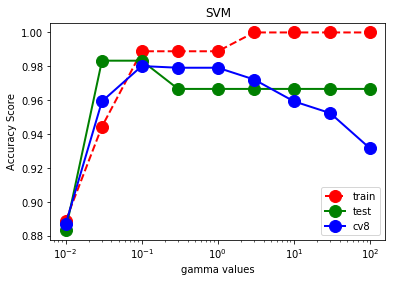

,gammas,train,test,cross
0,0.01,0.888889,0.883333,0.886905
1,0.03,0.944444,0.983333,0.959325
2,0.10,0.988889,0.983333,0.980159
3,0.30,0.988889,0.966667,0.979167
4,1.00,0.988889,0.966667,0.979167
5,3.00,1.000000,0.966667,0.972222
6,10.00,1.000000,0.966667,0.959325
7,30.00,1.000000,0.966667,0.952381
8,100.00,1.000000,0.966667,0.931548


In [32]:
# effects of gamma
# gamma
# gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
    
scores_train = []
scores_test = []
scores_cross = []
gammas = [0.01, 0.03,0.1,0.3, 1,3, 10,30, 100]
# here I only study effects on differernt degrees
for gamma in gammas:
    svc = svm.SVC(kernel="poly", gamma=gamma, degree =2)
    svc.fit (X_train,y_train)
    y_pred_train = svc.predict(X_train) # predict labels based on svc class (model has been updated in this class), and features X
    scores_train.append(metrics.accuracy_score(y_train, y_pred_train)) # metrics.accuracy_score() is used to calculate accuracy of training dataset
    y_pred_test = svc.predict(X_test)
    scores_test.append (metrics.accuracy_score(y_test, y_pred_test))
    # now deal with cross validation
    scores_cross.append (np.mean(cross_val_score(svc, X, y, cv=8)))
    
tr=plt.semilogx(gammas, scores_train, label='train',color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12) # this is just plot x as different Ks, y as the accuracy
te=plt.semilogx(gammas, scores_test,label='test',color='green', marker='o', linewidth=2, markersize=12)
tc=plt.semilogx(gammas, scores_cross,label='cv8',color='blue', marker='o', linewidth=2, markersize=12)
plt.legend()


plt.xlabel('gamma values')
plt.ylabel('Accuracy Score')
plt.title('SVM')

plt.show()

# put all data into pandas dataframe to show table
df = pd.DataFrame(data={'gammas': gammas, 'train': scores_train, 'test':scores_test, 'cross':scores_cross})
df


<h3>C</h3>
C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

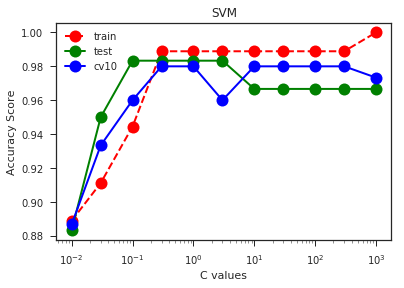

,C,train,test,cross
0,0.01,0.888889,0.883333,0.886667
1,0.03,0.911111,0.950000,0.933333
2,0.10,0.944444,0.983333,0.960000
3,0.30,0.988889,0.983333,0.980000
4,1.00,0.988889,0.983333,0.980000
5,3.00,0.988889,0.983333,0.960000
6,10.00,0.988889,0.966667,0.980000
7,30.00,0.988889,0.966667,0.980000
8,100.00,0.988889,0.966667,0.980000
9,300.00,0.988889,0.966667,0.980000


In [178]:
# effects of C   
scores_train = []
scores_test = []
scores_cross = []
cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# here I only study effects on differernt degrees
for c in cs:
    svc = svm.SVC(kernel="poly",C=c, gamma=0.1, degree =2)
    svc.fit (X_train,y_train)
    y_pred_train = svc.predict(X_train) # predict labels based on svc class (model has been updated in this class), and features X
    scores_train.append(metrics.accuracy_score(y_train, y_pred_train)) # metrics.accuracy_score() is used to calculate accuracy of training dataset
    y_pred_test = svc.predict(X_test)
    scores_test.append (metrics.accuracy_score(y_test, y_pred_test))
    # now deal with cross validation
    scores_cross.append (np.mean(cross_val_score(svc, X, y, cv=10)))
    
tr=plt.semilogx(cs, scores_train, label='train',color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12) # this is just plot x as different Ks, y as the accuracy
te=plt.semilogx(cs, scores_test,label='test',color='green', marker='o', linewidth=2, markersize=12)
tc=plt.semilogx(cs, scores_cross,label='cv10',color='blue', marker='o', linewidth=2, markersize=12)
plt.legend()


plt.xlabel('C values')
plt.ylabel('Accuracy Score')
plt.title('SVM')

plt.show()

# put all data into pandas dataframe to show table
df = pd.DataFrame(data={'C': cs, 'train': scores_train, 'test':scores_test, 'cross':scores_cross})
df

<h2>Decision tree</h2>

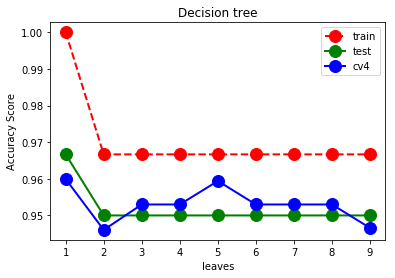

,leaves,train,test,cross
0,1,1.000000,0.966667,0.959936
1,2,0.966667,0.950000,0.946047
2,3,0.966667,0.950000,0.952991
3,4,0.966667,0.950000,0.952991
4,5,0.966667,0.950000,0.959402
5,6,0.966667,0.950000,0.952991
6,7,0.966667,0.950000,0.952991
7,8,0.966667,0.950000,0.952991
8,9,0.966667,0.950000,0.946581


In [34]:
# import tree library
from sklearn import tree
leaves= list(range (1,10,1))

scores_train = []
scores_test = []
scores_cross = []



# here I only study effects on differernt degrees
for num in leaves:
    clf = tree.DecisionTreeClassifier(min_samples_leaf = num)
    clf.fit (X_train,y_train)
    y_pred_train = clf.predict(X_train) # predict labels based on tree class (model has been updated in this class), and features X
    scores_train.append(metrics.accuracy_score(y_train, y_pred_train)) # metrics.accuracy_score() is used to calculate accuracy of training dataset
    y_pred_test = clf.predict(X_test)
    scores_test.append (metrics.accuracy_score(y_test, y_pred_test))
    # now deal with cross validation
    scores_cross.append (np.mean(cross_val_score(clf, X, y, cv=4)))
    
tr=plt.plot(leaves, scores_train, label='train',color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12) # this is just plot x as different Ks, y as the accuracy
te=plt.plot(leaves, scores_test,label='test',color='green', marker='o', linewidth=2, markersize=12)
tc=plt.plot(leaves, scores_cross,label='cv4',color='blue', marker='o', linewidth=2, markersize=12)
plt.legend()

plt.xlabel('leaves')
plt.ylabel('Accuracy Score')
plt.title('Decision tree')

plt.show()

# put all data into pandas dataframe to show table
df = pd.DataFrame(data={'leaves': leaves, 'train': scores_train, 'test':scores_test, 'cross':scores_cross})
df


<h2>Neuron Network</h2>

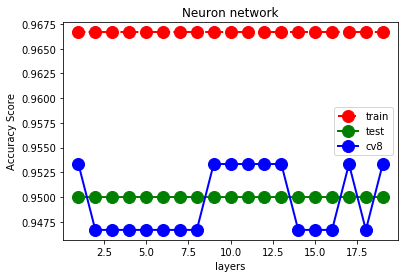

,layers,train,test,cross
0,1,0.966667,0.95,0.953333
1,2,0.966667,0.95,0.946667
2,3,0.966667,0.95,0.946667
3,4,0.966667,0.95,0.946667
4,5,0.966667,0.95,0.946667
5,6,0.966667,0.95,0.946667
6,7,0.966667,0.95,0.946667
7,8,0.966667,0.95,0.946667
8,9,0.966667,0.95,0.953333
9,10,0.966667,0.95,0.953333


In [45]:
# import tree library
from sklearn.neural_network import MLPClassifier
layers = list(range (1,20,1)) 

scores_train = []
scores_test = []
scores_cross = []

# here I only study effects on differernt degrees
for num in layers:
    MLPClassifier(alpha=0.0001, hidden_layer_sizes=(10, num))
    clf.fit (X_train,y_train)
    y_pred_train = clf.predict(X_train) # predict labels based on tree class (model has been updated in this class), and features X
    scores_train.append(metrics.accuracy_score(y_train, y_pred_train)) # metrics.accuracy_score() is used to calculate accuracy of training dataset
    y_pred_test = clf.predict(X_test)
    scores_test.append (metrics.accuracy_score(y_test, y_pred_test))
    # now deal with cross validation
    scores_cross.append (np.mean(cross_val_score(clf, X, y, cv=10)))
    
tr=plt.plot(layers, scores_train, label='train',color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12) # this is just plot x as different Ks, y as the accuracy
te=plt.plot(layers, scores_test,label='test',color='green', marker='o', linewidth=2, markersize=12)
tc=plt.plot(layers, scores_cross,label='cv8',color='blue', marker='o', linewidth=2, markersize=12)
plt.legend()

plt.xlabel('layers')
plt.ylabel('Accuracy Score')
plt.title('Neuron network')

plt.show()

# put all data into pandas dataframe to show table
df = pd.DataFrame(data={'layers': layers, 'train': scores_train, 'test':scores_test, 'cross':scores_cross})
df

<h2>Adaboost</h2>

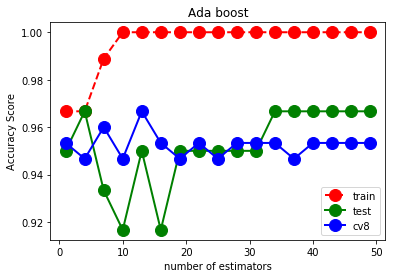

,estimators,train,test,cross
0,1,0.966667,0.950000,0.953333
1,4,0.966667,0.966667,0.946667
2,7,0.988889,0.933333,0.960000
3,10,1.000000,0.916667,0.946667
4,13,1.000000,0.950000,0.966667
5,16,1.000000,0.916667,0.953333
6,19,1.000000,0.950000,0.946667
7,22,1.000000,0.950000,0.953333
8,25,1.000000,0.950000,0.946667
9,28,1.000000,0.950000,0.953333


In [62]:
# import tree library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
estimators = list(range (1,50,3))

scores_train = []
scores_test = []
scores_cross = []

# here I only study effects on differernt degrees
for num in estimators:
    clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf = 20),algorithm="SAMME",n_estimators=num)
    clf.fit (X_train,y_train)
    y_pred_train = clf.predict(X_train) # predict labels based on tree class (model has been updated in this class), and features X
    scores_train.append(metrics.accuracy_score(y_train, y_pred_train)) # metrics.accuracy_score() is used to calculate accuracy of training dataset
    y_pred_test = clf.predict(X_test)
    scores_test.append (metrics.accuracy_score(y_test, y_pred_test))
    # now deal with cross validation
    scores_cross.append (np.mean(cross_val_score(clf, X, y, cv=10)))
    
tr=plt.plot(estimators, scores_train, label='train',color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12) # this is just plot x as different Ks, y as the accuracy
te=plt.plot(estimators, scores_test,label='test',color='green', marker='o', linewidth=2, markersize=12)
tc=plt.plot(estimators, scores_cross,label='cv8',color='blue', marker='o', linewidth=2, markersize=12)
plt.legend()

plt.xlabel('number of estimators')
plt.ylabel('Accuracy Score')
plt.title('Ada boost')

plt.show()

# put all data into pandas dataframe to show table
df = pd.DataFrame(data={'estimators': estimators, 'train': scores_train, 'test':scores_test, 'cross':scores_cross})
df